#   Import Libraries

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset into drugset

In [2]:
#Load Data From Drug Dataset
drugset = pd.read_csv('./drugdataset.csv')
drugset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,1,1,13.093,drugC
2,47,0,1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,1,1,18.043,drugY


# Finding the Key Statistics of the Dataset

In [8]:
#Key Statistics (Numerical Columns only)
drugset.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,1.090000,0.515000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,0.000000,1.000000,1.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


# Finding the different classes inside the dataset

In [9]:
#Identify number of Classes (i.e. Drugs)
drugset.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Count of Males and Females where 0 represents males and 1 represents female

In [10]:
drugset.groupby(['Sex']).size().reset_index(name='count')

,Sex,count
0,0,104
1,1,96


Count of Blood Pressure Level where 0 represents normal BP, 1 for low BP and 2 for High BP

In [11]:
drugset.groupby(['BP']).size().reset_index(name='count')

,BP,count
0,0,59
1,1,64
2,2,77


Count of Cholesterol Level 0 represents normal cholesterol, 1 for high cholestrol

In [12]:
drugset.groupby(['Cholesterol']).size().reset_index(name='count')

,Cholesterol,count
0,0,97
1,1,103


Box-Plot

<AxesSubplot:>

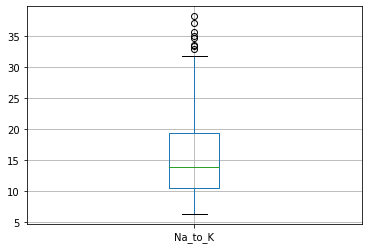

In [14]:
drugset.boxplot(column ='Na_to_K')

# Creating x and y variables, testing and scaling the data

In [12]:
#Create x and y variables
X = drugset.drop('Drug',axis=1).to_numpy()
y = drugset['Drug'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.2,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

# Scripting for neural network to get the evaluation report and also finding confusion matrix

In [14]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5,4,5),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names)) 

[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1 17]]
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         5
       drugC       1.00      0.67      0.80         3
       drugX       1.00      1.00      1.00         3
       drugA       0.92      1.00      0.96        11
       drugB       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



In [9]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))     


Estimator: DT
[[ 4  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 18]]
              precision    recall  f1-score   support

       drugY       1.00      0.80      0.89         5
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00         3
       drugA       1.00      0.91      0.95        11
       drugB       0.95      1.00      0.97        18

    accuracy                           0.95        40
   macro avg       0.94      0.94      0.93        40
weighted avg       0.96      0.95      0.95        40

